# CREATING RDDS

In [0]:
import pyspark

In [0]:
from pyspark.context import SparkContext

In [0]:
sc=SparkContext.getOrCreate() 

In [0]:
data=sc.textFile('/FileStore/tables/Iris.csv') 

# TRANSFORMATION AND ACTION

In [0]:
data.collect()

Out[5]: ['Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species',
 '1,5.1,3.5,1.4,0.2,Iris-setosa',
 '2,4.9,3.0,1.4,0.2,Iris-setosa',
 '3,4.7,3.2,1.3,0.2,Iris-setosa',
 '4,4.6,3.1,1.5,0.2,Iris-setosa',
 '5,5.0,3.6,1.4,0.2,Iris-setosa',
 '6,5.4,3.9,1.7,0.4,Iris-setosa',
 '7,4.6,3.4,1.4,0.3,Iris-setosa',
 '8,5.0,3.4,1.5,0.2,Iris-setosa',
 '9,4.4,2.9,1.4,0.2,Iris-setosa',
 '10,4.9,3.1,1.5,0.1,Iris-setosa',
 '11,5.4,3.7,1.5,0.2,Iris-setosa',
 '12,4.8,3.4,1.6,0.2,Iris-setosa',
 '13,4.8,3.0,1.4,0.1,Iris-setosa',
 '14,4.3,3.0,1.1,0.1,Iris-setosa',
 '15,5.8,4.0,1.2,0.2,Iris-setosa',
 '16,5.7,4.4,1.5,0.4,Iris-setosa',
 '17,5.4,3.9,1.3,0.4,Iris-setosa',
 '18,5.1,3.5,1.4,0.3,Iris-setosa',
 '19,5.7,3.8,1.7,0.3,Iris-setosa',
 '20,5.1,3.8,1.5,0.3,Iris-setosa',
 '21,5.4,3.4,1.7,0.2,Iris-setosa',
 '22,5.1,3.7,1.5,0.4,Iris-setosa',
 '23,4.6,3.6,1.0,0.2,Iris-setosa',
 '24,5.1,3.3,1.7,0.5,Iris-setosa',
 '25,4.8,3.4,1.9,0.2,Iris-setosa',
 '26,5.0,3.0,1.6,0.2,Iris-setosa',
 '27,5.0,3.4,1.6,0.4,I

In [0]:
data.take(5)

Out[6]: ['Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species',
 '1,5.1,3.5,1.4,0.2,Iris-setosa',
 '2,4.9,3.0,1.4,0.2,Iris-setosa',
 '3,4.7,3.2,1.3,0.2,Iris-setosa',
 '4,4.6,3.1,1.5,0.2,Iris-setosa']

In [0]:
data.cache()

Out[7]: /FileStore/tables/Iris.csv MapPartitionsRDD[1] at textFile at NativeMethodAccessorImpl.java:0

In [0]:
df=sc.parallelize('/FileStore/tables/Iris.csv') 

In [0]:
str1=data.map(lambda x: x.replace(',',''))

In [0]:
str1.collect()

Out[11]: ['IdSepalLengthCmSepalWidthCmPetalLengthCmPetalWidthCmSpecies',
 '15.13.51.40.2Iris-setosa',
 '24.93.01.40.2Iris-setosa',
 '34.73.21.30.2Iris-setosa',
 '44.63.11.50.2Iris-setosa',
 '55.03.61.40.2Iris-setosa',
 '65.43.91.70.4Iris-setosa',
 '74.63.41.40.3Iris-setosa',
 '85.03.41.50.2Iris-setosa',
 '94.42.91.40.2Iris-setosa',
 '104.93.11.50.1Iris-setosa',
 '115.43.71.50.2Iris-setosa',
 '124.83.41.60.2Iris-setosa',
 '134.83.01.40.1Iris-setosa',
 '144.33.01.10.1Iris-setosa',
 '155.84.01.20.2Iris-setosa',
 '165.74.41.50.4Iris-setosa',
 '175.43.91.30.4Iris-setosa',
 '185.13.51.40.3Iris-setosa',
 '195.73.81.70.3Iris-setosa',
 '205.13.81.50.3Iris-setosa',
 '215.43.41.70.2Iris-setosa',
 '225.13.71.50.4Iris-setosa',
 '234.63.61.00.2Iris-setosa',
 '245.13.31.70.5Iris-setosa',
 '254.83.41.90.2Iris-setosa',
 '265.03.01.60.2Iris-setosa',
 '275.03.41.60.4Iris-setosa',
 '285.23.51.50.2Iris-setosa',
 '295.23.41.40.2Iris-setosa',
 '304.73.21.60.2Iris-setosa',
 '314.83.11.60.2Iris-setosa',
 '325.

In [0]:
data.count()

Out[12]: 151

In [0]:
rdds_count=data.filter(lambda x:'SepalLength' not in x )

In [0]:
rdds_count.count()

Out[14]: 150

In [0]:
iris_satosa=data.filter(lambda y: 'Iris-setosa' not in y)

In [0]:
iris_satosa.count()

Out[16]: 101

#SPARK SQL

In [0]:
from pyspark.sql import SparkSession

In [0]:
df1=spark.read.option('header','true').csv('/FileStore/tables/Iris.csv')

In [0]:
df1.describe()

Out[20]: DataFrame[summary: string, Id: string, SepalLengthCm: string, SepalWidthCm: string, PetalLengthCm: string, PetalWidthCm: string, Species: string]

In [0]:
df1.printSchema()

root
 |-- Id: string (nullable = true)
 |-- SepalLengthCm: string (nullable = true)
 |-- SepalWidthCm: string (nullable = true)
 |-- PetalLengthCm: string (nullable = true)
 |-- PetalWidthCm: string (nullable = true)
 |-- Species: string (nullable = true)



In [0]:
df1.show(5)

+---+-------------+------------+-------------+------------+-----------+
| Id|SepalLengthCm|SepalWidthCm|PetalLengthCm|PetalWidthCm|    Species|
+---+-------------+------------+-------------+------------+-----------+
|  1|          5.1|         3.5|          1.4|         0.2|Iris-setosa|
|  2|          4.9|         3.0|          1.4|         0.2|Iris-setosa|
|  3|          4.7|         3.2|          1.3|         0.2|Iris-setosa|
|  4|          4.6|         3.1|          1.5|         0.2|Iris-setosa|
|  5|          5.0|         3.6|          1.4|         0.2|Iris-setosa|
+---+-------------+------------+-------------+------------+-----------+
only showing top 5 rows



In [0]:
df1.registerTempTable('Iris')

/databricks/spark/python/pyspark/sql/dataframe.py:146: FutureWarning: Deprecated in 2.0, use createOrReplaceTempView instead.
  warnings.warn(


In [0]:
view=spark.sql('select * from Iris')

In [0]:
view.show(5)

+---+-------------+------------+-------------+------------+-----------+
| Id|SepalLengthCm|SepalWidthCm|PetalLengthCm|PetalWidthCm|    Species|
+---+-------------+------------+-------------+------------+-----------+
|  1|          5.1|         3.5|          1.4|         0.2|Iris-setosa|
|  2|          4.9|         3.0|          1.4|         0.2|Iris-setosa|
|  3|          4.7|         3.2|          1.3|         0.2|Iris-setosa|
|  4|          4.6|         3.1|          1.5|         0.2|Iris-setosa|
|  5|          5.0|         3.6|          1.4|         0.2|Iris-setosa|
+---+-------------+------------+-------------+------------+-----------+
only showing top 5 rows



In [0]:
unique=spark.sql('select count(distinct Species) from Iris')

In [0]:
unique.show()

+-----------------------+
|count(DISTINCT Species)|
+-----------------------+
|                      3|
+-----------------------+



In [0]:
sepal_Length=spark.sql('select SepalLengthCm from Iris where  SepalLengthCm>5')

In [0]:
sepal_Length.show()

+-------------+
|SepalLengthCm|
+-------------+
|          7.0|
|          6.4|
|          6.9|
|          6.5|
|          6.3|
|          6.6|
|          6.0|
|          6.1|
|          6.7|
|          6.2|
|          6.1|
|          6.3|
|          6.1|
|          6.4|
|          6.6|
|          6.8|
|          6.7|
|          6.0|
|          6.0|
|          6.0|
+-------------+
only showing top 20 rows



In [0]:
group=spark.sql("select Species, max(SepalLengthCm) as Maximum_Sepal_Length from Iris group by Species")

In [0]:
group.show()

+---------------+--------------------+
|        Species|Maximum_Sepal_Length|
+---------------+--------------------+
|    Iris-setosa|                 5.8|
|Iris-versicolor|                 7.0|
| Iris-virginica|                 7.9|
+---------------+--------------------+



In [0]:
width=spark.sql("select Species,max( SepalWidthCm) as Sepal_Width from Iris group by Species")

In [0]:
width.show(5)

+---------------+-----------+
|        Species|Sepal_Width|
+---------------+-----------+
|    Iris-setosa|        4.4|
|Iris-versicolor|        3.4|
| Iris-virginica|        3.8|
+---------------+-----------+



#PANDAS

In [0]:
dff=df1.toPandas()

In [0]:
import pandas as pd

In [0]:
dff.head(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [0]:
dff.isnull().sum()

Out[41]: Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [0]:
import seaborn as sns

Out[45]: <AxesSubplot:>

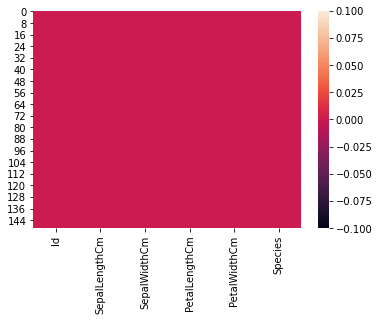

In [0]:
sns.heatmap(dff.isnull())

Out[48]: <AxesSubplot:>

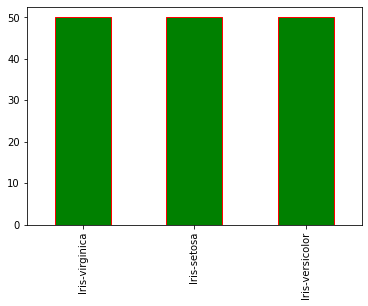

In [0]:
dff['Species'].value_counts().plot(kind='bar',edgecolor='red',color='green')

In [0]:
dff[['Species','SepalLengthCm']].groupby('Species').aggregate({'SepalLengthCm':'sum'})

,SepalLengthCm
Species,
Iris-setosa,5.14.94.74.65.05.44.65.04.44.95.44.84.84.35.85...
Iris-versicolor,7.06.46.95.56.55.76.34.96.65.25.05.96.06.15.66...
Iris-virginica,6.35.87.16.36.57.64.97.36.77.26.56.46.85.75.86...


In [0]:
dff=dff.drop(['Species'],axis=1).astype('float')

In [0]:
dff=dff.astype('int')

Out[59]: <AxesSubplot:>

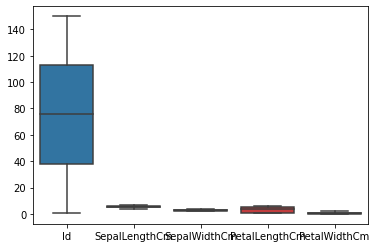

In [0]:
sns.boxplot(data=dff)